In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np
from IPython.display import display
from scipy import stats
from joblib import Parallel, delayed

In [2]:
pd.set_option("display.max_columns", 80)

In [3]:
train_ts = pd.read_csv("../data/input/training_set.csv")
test_ts = pd.read_feather("../data/input/test_set.ftr")
display(train_ts.head())

/home/hakubishin3/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [4]:
train_meta = pd.read_csv("../data/input/training_set_metadata.csv")
test_meta = pd.read_csv("../data/input/test_set_metadata.csv")

### 各バンドの最大データ点数

In [13]:
train_ts.groupby(["object_id" ,"passband"]).size().reset_index().groupby("passband").max()

,object_id,0
passband,,
0,130779836,72
1,130779836,58
2,130779836,58
3,130779836,58
4,130779836,58
5,130779836,57


In [14]:
test_ts.groupby(["object_id" ,"passband"]).size().reset_index().groupby("passband").max()

,object_id,0
passband,,
0,130788054,72
1,130788054,58
2,130788054,58
3,130788054,58
4,130788054,58
5,130788054,57


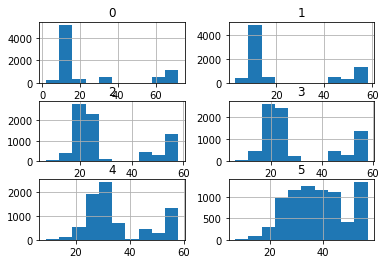

In [125]:
train_ts.groupby(["object_id" ,"passband"]).size().unstack().hist()
plt.show()

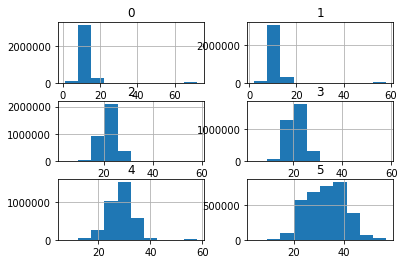

In [126]:
test_ts.groupby(["object_id" ,"passband"]).size().unstack().hist()
plt.show()

In [28]:
display(train_ts.groupby(["object_id" ,"passband"]).size().reset_index().groupby(["passband", 0]).size().unstack())

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,55,56,57,58,63,70,72
passband,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,6.0,5.0,13.0,36.0,51.0,135.0,308.0,553.0,843.0,994.0,1009.0,865.0,559.0,254.0,74.0,20.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.0,438.0,662.0
1,NaN,3.0,7.0,23.0,53.0,90.0,254.0,613.0,1074.0,1347.0,1132.0,639.0,335.0,114.0,37.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.0,NaN,NaN,NaN,NaN,NaN,NaN,299.0,NaN,801.0,NaN,546.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4.0,3.0,5.0,13.0,15.0,12.0,21.0,42.0,53.0,117.0,173.0,310.0,427.0,581.0,727.0,768.0,764.0,640.0,482.0,292.0,158.0,69.0,36.0,14.0,5.0,1.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,466.0,NaN,NaN,NaN,NaN,NaN,NaN,298.0,2.0,798.0,NaN,546.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,3.0,6.0,8.0,15.0,13.0,26.0,49.0,80.0,130.0,180.0,303.0,399.0,567.0,648.0,677.0,686.0,615.0,521.0,366.0,200.0,130.0,70.0,29.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.0,NaN,NaN,NaN,NaN,NaN,2.0,298.0,NaN,800.0,NaN,546.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,10.0,5.0,13.0,15.0,14.0,29.0,44.0,50.0,64.0,87.0,167.0,191.0,253.0,311.0,390.0,439.0,512.0,554.0,563.0,470.0,470.0,362.0,295.0,161.0,110.0,91.0,31.0,16.0,5.0,5.0,NaN,NaN,1.0,470.0,NaN,NaN,NaN,NaN,NaN,299.0,NaN,NaN,801.0,NaN,546.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,7.0,1.0,4.0,5.0,4.0,4.0,9.0,17.0,26.0,23.0,28.0,34.0,56.0,67.0,105.0,129.0,182.0,235.0,208.0,216.0,225.0,247.0,229.0,213.0,252.0,292.0,252.0,238.0,260.0,225.0,232.0,238.0,238.0,223.0,227.0,181.0,170.0,129.0,575.0,75.0,52.0,37.0,24.0,5.0,301.0,1.0,363.0,438.0,546.0,NaN,NaN,NaN,NaN


In [29]:
display(test_ts.groupby(["object_id" ,"passband"]).size().reset_index().groupby(["passband", 0]).size().unstack())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,63,70,72
passband,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52.0,180.0,912.0,3149.0,8390.0,13504.0,21231.0,60279.0,155678.0,305186.0,476197.0,604144.0,632260.0,559504.0,378550.0,170497.0,51997.0,14690.0,2954.0,610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7535.0,6750.0,12426.0
1,NaN,276.0,889.0,2940.0,11356.0,19177.0,51442.0,152822.0,363320.0,668053.0,805597.0,668980.0,415913.0,191330.0,72777.0,24686.0,8831.0,1470.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6215.0,NaN,NaN,NaN,NaN,NaN,NaN,5010.0,NaN,NaN,NaN,14166.0,NaN,7535.0,NaN,NaN,NaN
2,NaN,NaN,NaN,28.0,37.0,51.0,554.0,1014.0,2282.0,4534.0,6550.0,7833.0,10007.0,20241.0,28264.0,52414.0,91993.0,157158.0,247971.0,335998.0,437345.0,474127.0,476646.0,412546.0,302148.0,199100.0,105003.0,50335.0,21770.0,9155.0,3772.0,934.0,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6215.0,NaN,NaN,NaN,NaN,NaN,NaN,5010.0,NaN,NaN,NaN,14166.0,NaN,7535.0,NaN,NaN,NaN
3,NaN,NaN,NaN,27.0,27.0,384.0,1018.0,1994.0,2892.0,6162.0,6632.0,13053.0,21468.0,34986.0,64101.0,106821.0,171290.0,238170.0,316993.0,384075.0,410843.0,421461.0,378193.0,322790.0,239174.0,151053.0,90500.0,42846.0,21291.0,7368.0,3046.0,1029.0,277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6215.0,NaN,NaN,NaN,NaN,NaN,NaN,5010.0,NaN,NaN,NaN,14166.0,NaN,7535.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,51.0,43.0,750.0,840.0,1629.0,2388.0,3588.0,4655.0,7179.0,9301.0,15441.0,21841.0,30937.0,39222.0,63012.0,90915.0,122488.0,169986.0,204916.0,248504.0,284579.0,324782.0,336331.0,321799.0,281348.0,253560.0,204828.0,154159.0,108497.0,69169.0,43758.0,21776.0,9142.0,5429.0,2121.0,775.0,76.0,149.0,6215.0,NaN,NaN,NaN,NaN,NaN,5010.0,NaN,1.0,NaN,NaN,14165.0,NaN,7535.0,NaN,NaN,NaN
5,NaN,NaN,NaN,85.0,67.0,54.0,776.0,644.0,1011.0,1041.0,1913.0,2112.0,3975.0,6485.0,9219.0,13957.0,15769.0,22343.0,32064.0,42148.0,63987.0,88778.0,116479.0,142604.0,132532.0,139405.0,142775.0,137878.0,137859.0,141759.0,146522.0,155999.0,165741.0,157834.0,160937.0,147714.0,147072.0,140925.0,135499.0,134166.0,132213.0,114887.0,91898.0,73601.0,63315.0,40186.0,25936.0,15113.0,9496.0,5126.0,7087.0,944.0,555.0,308.0,7739.0,6823.0,7535.0,NaN,NaN,NaN,NaN


### pure補正について

In [5]:
train_ts = pd.merge(train_ts, train_meta[["object_id", "distmod"]], on="object_id")
train_ts["distmod"] = train_ts["distmod"].fillna(0)
flux = train_ts["flux"]
train_ts['flux'] = np.where(flux < 1, 2.5*np.log10(-flux+2), -2.5*np.log10(flux)) - train_ts['distmod']

/home/hakubishin3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [6]:
test_ts = pd.merge(test_ts, test_meta[["object_id", "distmod"]], on="object_id")
test_ts["distmod"] = test_ts["distmod"].fillna(0)
flux = test_ts["flux"]
test_ts['flux'] = np.where(flux < 1, 2.5*np.log10(-flux+2), -2.5*np.log10(flux)) - test_ts['distmod']

/home/hakubishin3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/hakubishin3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [11]:
test_ts.groupby("passband")["flux"].mean()

passband
0   -37.728787
1   -37.611265
2   -37.855815
3   -38.048840
4   -37.738764
5   -37.656152
Name: flux, dtype: float64

In [12]:
test_ts.groupby("passband")["flux"].std()

passband
0    13.329715
1    13.492141
2    13.602759
3    13.585611
4    13.985811
5    14.149020
Name: flux, dtype: float64

In [21]:
train_meta = train_meta[train_meta.hostgal_photoz != 0]
test_meta = test_meta[test_meta.hostgal_photoz != 0]
train_ts = train_ts.query("object_id in @train_meta.object_id.tolist()")
test_ts = test_ts.query("object_id in @test_meta.object_id.tolist()")

In [29]:
all = pd.concat([train_ts, test_ts])

In [30]:
all.groupby("passband")["flux"].mean()

passband
0   -42.122460
1   -42.154484
2   -42.444490
3   -42.590955
4   -42.560884
5   -42.520230
Name: flux, dtype: float64

In [31]:
all.groupby("passband")["flux"].std()

passband
0    2.844024
1    2.243175
2    2.487495
3    2.743835
4    3.121542
5    3.657558
Name: flux, dtype: float64

(array([6.0000e+00, 2.0500e+02, 2.3070e+03, 8.1400e+03, 2.6232e+04,
        5.7625e+04, 4.1296e+04, 8.5330e+03, 6.4400e+02, 5.1000e+01]),
 array([-5.42068455, -4.39779834, -3.37491212, -2.35202591, -1.3291397 ,
        -0.30625349,  0.71663272,  1.73951893,  2.76240514,  3.78529135,
         4.80817756]),
 <a list of 10 Patch objects>)

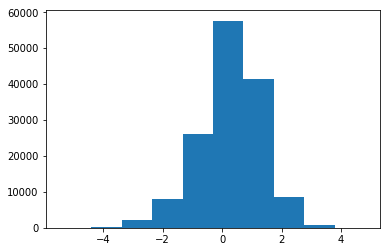

In [34]:
plt.hist( (train_ts.query("passband == 0")["flux"] - -42.122460) / 2.844024)

In [35]:
( (train_ts.query("passband == 0")["flux"] - -42.122460) / 2.844024).mean()

0.27733673714268475

### testデータのサンプリングについて

In [88]:
gal_obj_list_train = train_meta.query("hostgal_photoz == 0").object_id.values.tolist()
exgal_obj_list_train = train_meta.query("hostgal_photoz != 0").object_id.values.tolist()
len(gal_obj_list_train), len(exgal_obj_list_train), len(gal_obj_list_train) / (len(gal_obj_list_train) + len(exgal_obj_list_train))

(2325, 5523, 0.2962538226299694)

In [89]:
gal_obj_list_test = test_meta.query("hostgal_photoz == 0").object_id.values.tolist()
exgal_obj_list_test = test_meta.query("hostgal_photoz != 0").object_id.values.tolist()
len(gal_obj_list_test), len(exgal_obj_list_test), len(gal_obj_list_test) / (len(gal_obj_list_test) + len(exgal_obj_list_test))

(390510, 3102380, 0.1118014022771974)

In [87]:
import random
"""リストから重複なしでランダムに要素をn個取り出す
random.sample([1,2,3,4,5,6], 6)
"""

n_choice = 100000
random.seed(71)
choice_obj_list = random.sample(test_meta.object_id.tolist(), n_choice)
merge_ts = pd.concat([train_ts, test_ts.query("object_id in @choice_obj_list")], axis=0)
len(choice_obj_list), merge_ts.shape

(100000, (14404302, 6))

In [93]:
merge_meta = pd.concat([train_meta, test_meta], axis=0)
merge_meta = merge_meta.query("object_id in @choice_obj_list")

gal_obj_list = merge_meta.query("hostgal_photoz == 0").object_id.values.tolist()
exgal_obj_list = merge_meta.query("hostgal_photoz != 0").object_id.values.tolist()
len(gal_obj_list), len(exgal_obj_list), len(gal_obj_list) / (len(gal_obj_list) + len(exgal_obj_list))

/home/hakubishin3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(11077, 88923, 0.11077)

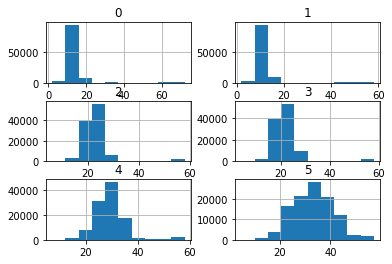

In [94]:
merge_ts.groupby(["object_id" ,"passband"]).size().unstack().hist()
plt.show()

In [95]:
display(merge_ts.groupby(["object_id" ,"passband"]).size().reset_index().groupby(["passband", 0]).size().unstack())

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,63,70,72
passband,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9.0,32.0,99.0,260.0,404.0,664.0,1868.0,4707.0,9397.0,14469.0,18241.0,18911.0,17012.0,11409.0,5158.0,1586.0,459.0,93.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780.0,628.0,1004.0
1,13.0,26.0,99.0,322.0,589.0,1548.0,4516.0,11155.0,20258.0,24414.0,20276.0,12632.0,5686.0,2245.0,704.0,265.0,46.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640.0,NaN,NaN,NaN,NaN,NaN,NaN,438.0,NaN,NaN,NaN,1194.0,NaN,780.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,2.0,16.0,23.0,58.0,145.0,191.0,239.0,309.0,613.0,812.0,1541.0,2881.0,4896.0,7440.0,10280.0,13481.0,14344.0,14240.0,12578.0,9048.0,5945.0,3149.0,1454.0,698.0,262.0,120.0,26.0,6.0,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,636.0,NaN,NaN,NaN,NaN,NaN,NaN,437.0,NaN,NaN,2.0,1191.0,NaN,780.0,NaN,NaN,NaN
3,NaN,NaN,1.0,1.0,9.0,28.0,77.0,91.0,187.0,201.0,368.0,649.0,1150.0,2070.0,3273.0,5310.0,7213.0,9535.0,11579.0,12406.0,12517.0,11599.0,9785.0,7199.0,4561.0,2695.0,1294.0,641.0,222.0,96.0,33.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640.0,NaN,NaN,NaN,NaN,NaN,2.0,437.0,NaN,NaN,NaN,1193.0,NaN,780.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2.0,3.0,25.0,33.0,37.0,77.0,113.0,141.0,223.0,277.0,508.0,704.0,998.0,1171.0,1879.0,2800.0,3634.0,5187.0,6223.0,7389.0,8526.0,9812.0,10142.0,9838.0,8476.0,7848.0,6129.0,4766.0,3172.0,2117.0,1341.0,666.0,272.0,158.0,75.0,26.0,2.0,6.0,640.0,NaN,NaN,NaN,NaN,NaN,438.0,NaN,NaN,NaN,NaN,1194.0,NaN,780.0,NaN,NaN,NaN
5,NaN,NaN,NaN,2.0,3.0,23.0,29.0,43.0,32.0,53.0,66.0,137.0,222.0,302.0,437.0,474.0,637.0,951.0,1327.0,1951.0,2665.0,3528.0,4320.0,4048.0,4212.0,4301.0,4254.0,4221.0,4252.0,4465.0,4611.0,4964.0,4834.0,4923.0,4403.0,4524.0,4283.0,4026.0,4067.0,3971.0,3460.0,2723.0,2269.0,2368.0,1261.0,758.0,464.0,294.0,142.0,506.0,29.0,19.0,8.0,576.0,630.0,780.0,NaN,NaN,NaN,NaN


### train, validの分け方

In [99]:
from sklearn.model_selection import StratifiedKFold, KFold

def get_StratifiedKFold(y_train, n_splits=5, shuffle=True, random_state=71):

    folds = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    fold_ids = []

    for train_index, valid_index in folds.split(y_train, y_train):
        fold_ids.append([train_index, valid_index])

    return fold_ids

In [117]:
# 目的変数となるパスバンドに対して、stratifiedKFoldを適用する
extract = merge_ts.query("passband == @target_passband").groupby("object_id").size()
target_passband = 5
fold_ids = get_StratifiedKFold(extract, n_splits=2)
train_ids = fold_ids[0][0]
valid_ids = fold_ids[0][1]
trn_obj = extract.iloc[train_ids].index.tolist()
val_obj = extract.iloc[valid_ids].index.tolist()
len(trn_obj), len(val_obj)

(53911, 53937)

In [118]:
trn_ts = merge_ts.query("object_id in @trn_obj")
val_ts = merge_ts.query("object_id in @val_obj")
trn_ts.shape, val_ts.shape

((7201154, 6), (7203148, 6))

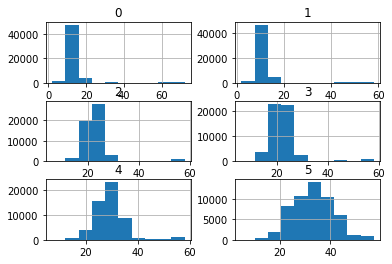

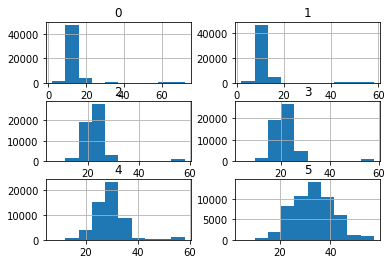

In [119]:
trn_ts.groupby(["object_id" ,"passband"]).size().unstack().hist()
plt.show()

val_ts.groupby(["object_id" ,"passband"]).size().unstack().hist()
plt.show()

In [120]:
display(trn_ts.groupby(["object_id" ,"passband"]).size().reset_index().groupby(["passband", 0]).size().unstack())

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,63,70,72
passband,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.0,19.0,46.0,138.0,211.0,335.0,915.0,2347.0,4643.0,7246.0,9087.0,9408.0,8380.0,5824.0,2657.0,850.0,225.0,37.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,314.0,502.0
1,4.0,9.0,39.0,149.0,294.0,773.0,2290.0,5546.0,10175.0,12056.0,10279.0,6284.0,2857.0,1119.0,343.0,138.0,25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.0,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,599.0,NaN,390.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1.0,8.0,13.0,34.0,80.0,94.0,124.0,129.0,303.0,381.0,816.0,1423.0,2470.0,3722.0,5152.0,6760.0,7191.0,7107.0,6208.0,4494.0,3004.0,1571.0,730.0,365.0,130.0,57.0,13.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,321.0,NaN,NaN,NaN,NaN,NaN,NaN,216.0,NaN,NaN,NaN,598.0,NaN,390.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,13.0,41.0,41.0,105.0,101.0,162.0,329.0,547.0,1034.0,1635.0,2660.0,3612.0,4815.0,5783.0,6215.0,6222.0,5768.0,4881.0,3590.0,2271.0,1387.0,638.0,344.0,110.0,51.0,20.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.0,NaN,NaN,NaN,NaN,NaN,2.0,216.0,NaN,NaN,NaN,598.0,NaN,390.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,3.0,13.0,14.0,21.0,38.0,51.0,74.0,101.0,137.0,252.0,377.0,507.0,598.0,937.0,1387.0,1822.0,2552.0,3152.0,3738.0,4319.0,4813.0,5176.0,4889.0,4205.0,3913.0,3063.0,2334.0,1630.0,1045.0,644.0,304.0,125.0,88.0,38.0,14.0,2.0,4.0,324.0,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,599.0,NaN,390.0,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,1.0,11.0,14.0,21.0,16.0,26.0,33.0,68.0,111.0,151.0,218.0,237.0,318.0,475.0,663.0,975.0,1332.0,1764.0,2160.0,2024.0,2106.0,2150.0,2127.0,2110.0,2126.0,2232.0,2305.0,2482.0,2417.0,2461.0,2201.0,2262.0,2141.0,2013.0,2033.0,1985.0,1730.0,1361.0,1134.0,1184.0,630.0,379.0,232.0,147.0,71.0,253.0,14.0,9.0,4.0,288.0,315.0,390.0,NaN,NaN,NaN,NaN


In [121]:
display(val_ts.groupby(["object_id" ,"passband"]).size().reset_index().groupby(["passband", 0]).size().unstack())

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,63,70,72
passband,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.0,13.0,53.0,122.0,193.0,329.0,953.0,2360.0,4754.0,7223.0,9154.0,9503.0,8632.0,5585.0,2501.0,736.0,234.0,56.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,314.0,502.0
1,9.0,17.0,60.0,173.0,295.0,775.0,2226.0,5609.0,10083.0,12358.0,9997.0,6348.0,2829.0,1126.0,361.0,127.0,21.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,221.0,NaN,NaN,NaN,595.0,NaN,390.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1.0,8.0,10.0,24.0,65.0,97.0,115.0,180.0,310.0,431.0,725.0,1458.0,2426.0,3718.0,5128.0,6721.0,7153.0,7133.0,6370.0,4554.0,2941.0,1578.0,724.0,333.0,132.0,63.0,13.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.0,NaN,NaN,NaN,NaN,NaN,NaN,221.0,NaN,NaN,2.0,593.0,NaN,390.0,NaN,NaN,NaN
3,NaN,NaN,1.0,1.0,6.0,15.0,36.0,50.0,82.0,100.0,206.0,320.0,603.0,1036.0,1638.0,2650.0,3601.0,4720.0,5796.0,6191.0,6295.0,5831.0,4904.0,3609.0,2290.0,1308.0,656.0,297.0,112.0,45.0,13.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,221.0,NaN,NaN,NaN,595.0,NaN,390.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,12.0,19.0,16.0,39.0,62.0,67.0,122.0,140.0,256.0,327.0,491.0,573.0,942.0,1413.0,1812.0,2635.0,3071.0,3651.0,4207.0,4999.0,4966.0,4949.0,4271.0,3935.0,3066.0,2432.0,1542.0,1072.0,697.0,362.0,147.0,70.0,37.0,12.0,NaN,2.0,316.0,NaN,NaN,NaN,NaN,NaN,221.0,NaN,NaN,NaN,NaN,595.0,NaN,390.0,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,2.0,12.0,15.0,22.0,16.0,27.0,33.0,69.0,111.0,151.0,219.0,237.0,319.0,476.0,664.0,976.0,1333.0,1764.0,2160.0,2024.0,2106.0,2151.0,2127.0,2111.0,2126.0,2233.0,2306.0,2482.0,2417.0,2462.0,2202.0,2262.0,2142.0,2013.0,2034.0,1986.0,1730.0,1362.0,1135.0,1184.0,631.0,379.0,232.0,147.0,71.0,253.0,15.0,10.0,4.0,288.0,315.0,390.0,NaN,NaN,NaN,NaN


### padding_process(keras)

In [5]:
%%time
from keras.preprocessing.sequence import pad_sequences

def extract_ts(extract_obj):
    return extract_obj.values

x_pad_list = []
for passband in range(0, 6):
    train_ts_extract = train_ts.query("passband == @passband").sort_values(["object_id", "mjd"]).reset_index(drop=True)
    max_length = train_ts_extract.groupby("object_id").size().max()   # passband毎に、最大系列長を計算
    x_list = Parallel(n_jobs=-1)(
        [delayed(extract_ts)(train_ts_extract.query("object_id == @object_id")[["mjd", "flux", "flux_err"]]) for object_id in train_ts.object_id.unique()])
    x_pad = pad_sequences(x_list, value=np.nan, dtype="float32", padding='post', maxlen=max_length)
    x_pad_list.append(x_pad)
    print(f"passband:{passband}, {x_pad.shape}")

/home/hakubishin3/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


passband:0, (7848, 72, 3)
passband:1, (7848, 58, 3)
passband:2, (7848, 58, 3)
passband:3, (7848, 58, 3)
passband:4, (7848, 58, 3)
passband:5, (7848, 57, 3)
CPU times: user 7min 37s, sys: 25.4 s, total: 8min 3s
Wall time: 2min 30s


In [6]:
x_pad_list[0][0]

array([[ 5.98191523e+04,  6.87878418e+00,  3.63315201e+00],
       [ 5.98201055e+04,  3.93648529e+01,  3.77561903e+00],
       [ 5.98211016e+04, -1.04223814e+01,  4.17268276e+00],
       [ 5.98221094e+04, -6.54851303e+01,  4.36287594e+00],
       [ 5.98231523e+04, -1.13349159e+02,  4.06905079e+00],
       [ 5.98511133e+04, -6.85024567e+01,  3.33855510e+00],
       [ 5.98740586e+04, -9.73531952e+01,  3.13399005e+00],
       [ 5.98750312e+04, -9.75238800e+01,  2.96307492e+00],
       [ 5.98760234e+04, -1.08672577e+02,  3.44971395e+00],
       [ 5.98770234e+04, -1.16913223e+02,  3.09783602e+00],
       [ 5.98780234e+04, -1.02768921e+02,  3.13577199e+00],
       [ 5.98790234e+04, -5.24070892e+01,  3.26155901e+00],
       [ 5.98800273e+04,  5.55677147e+01,  3.35526800e+00],
       [ 6.01184180e+04, -1.07080536e+02,  3.10251307e+00],
       [ 6.01402305e+04, -8.89811554e+01,  3.46843004e+00],
       [ 6.01412227e+04, -5.01793365e+01,  4.73419285e+00],
       [ 6.01422188e+04,  5.00086403e+01

### padding_process(pandas)

In [7]:
def get_timeseries_by_column_name(ts_data, passband, column_name):
    ts_data_passband = ts_data.query("passband == @passband")
    ts_column_timeseries = ts_data_passband.groupby('object_id')[column_name].apply(lambda df: df.reset_index(drop=True)).unstack()
    # ts_column_timeseries.fillna(0, inplace=True)
    ts_column_timeseries  = ts_column_timeseries.reset_index()
    
    # add colname (for sort name)
    if column_name == "mjd":
        ts_column_timeseries['feature_id'] = "1_mjd"
    elif column_name == "flux":
        ts_column_timeseries['feature_id'] = "2_flux"
    elif column_name == "flux_err":
        ts_column_timeseries['feature_id'] = "3_flux_err"

    return ts_column_timeseries

def get_timeseries(ts_data, passband):
    colnames = ['mjd', 'flux', 'flux_err']
    n_obj = ts_data.object_id.nunique()
    # df = pd.concat([get_timeseries_by_column_name(ts_data, passband, col) for col in colnames])
    results = Parallel(n_jobs=-1)(
        [delayed(get_timeseries_by_column_name)(ts_data, passband, col) for col in colnames])
    df = pd.concat(results)    
    df = df.set_index(['object_id', 'feature_id']).sort_index().unstack()
    x_pad = df.values.reshape(n_obj, -1, len(colnames)).astype("float32")

    return x_pad

In [8]:
%%time
train_ts = train_ts.sort_values(["object_id", "passband", "mjd"])
x_pad_v2_list = []
for passband in range(0, 6):
    x_pad = get_timeseries(train_ts, passband)
    x_pad_v2_list.append(x_pad)
    print(f"passband:{passband}, {x_pad.shape}")

passband:0, (7848, 72, 3)
passband:1, (7848, 58, 3)
passband:2, (7848, 58, 3)
passband:3, (7848, 58, 3)
passband:4, (7848, 58, 3)
passband:5, (7848, 57, 3)
CPU times: user 12.2 s, sys: 6.53 s, total: 18.8 s
Wall time: 18 s


In [13]:
%%time
test_ts = test_ts.sort_values(["object_id", "passband", "mjd"])
for passband in range(0, 6):
    if passband != 5:
        continue

    x_pad = get_timeseries(test_ts, passband)
    print(f"passband:{passband}, {x_pad.shape}")
    np.save(f'test_x_pad_passband{passband}_pure.npy', x_pad)
    del x_pad
    gc.collect()

passband:5, (3492890, 57, 3)
CPU times: user 5min 56s, sys: 2min 40s, total: 8min 37s
Wall time: 21min 12s


In [9]:
x_pad_v2_list[3][1023]

array([[ 5.9770383e+04,  1.9439501e-01,  1.0538330e+00],
       [ 5.9779414e+04, -7.9708003e-02,  2.4595029e+00],
       [ 5.9782254e+04,  4.8400000e-01,  2.0632710e+00],
       [ 5.9797348e+04,  3.6413660e+00,  1.6881620e+00],
       [ 5.9800250e+04,  1.5616220e+00,  2.4579339e+00],
       [ 5.9808238e+04,  2.5636470e+00,  1.6099620e+00],
       [ 5.9811145e+04,  1.1738344e+01,  1.7275550e+00],
       [ 5.9814137e+04,  3.3244228e+01,  1.4136710e+00],
       [ 5.9826371e+04,  1.3222775e+02,  1.7691960e+00],
       [ 5.9836156e+04,  1.4446684e+02,  1.9307730e+00],
       [ 5.9839094e+04,  1.4161548e+02,  1.5818920e+00],
       [ 5.9842082e+04,  1.2786131e+02,  1.4399300e+00],
       [ 5.9854039e+04,  7.6802727e+01,  1.7647960e+00],
       [ 5.9857109e+04,  6.9328300e+01,  2.1539090e+00],
       [ 5.9866031e+04,  5.0354046e+01,  1.2453150e+00],
       [ 5.9869035e+04,  4.2607430e+01,  1.3082610e+00],
       [ 5.9872035e+04,  3.8837730e+01,  1.1140020e+00],
       [ 5.9884047e+04,  2.2782

In [10]:
x_pad_list[3][1023]

array([[ 5.9770383e+04,  1.9439501e-01,  1.0538330e+00],
       [ 5.9779414e+04, -7.9708003e-02,  2.4595029e+00],
       [ 5.9782254e+04,  4.8400000e-01,  2.0632710e+00],
       [ 5.9797348e+04,  3.6413660e+00,  1.6881620e+00],
       [ 5.9800250e+04,  1.5616220e+00,  2.4579339e+00],
       [ 5.9808238e+04,  2.5636470e+00,  1.6099620e+00],
       [ 5.9811145e+04,  1.1738344e+01,  1.7275550e+00],
       [ 5.9814137e+04,  3.3244228e+01,  1.4136710e+00],
       [ 5.9826371e+04,  1.3222775e+02,  1.7691960e+00],
       [ 5.9836156e+04,  1.4446684e+02,  1.9307730e+00],
       [ 5.9839094e+04,  1.4161548e+02,  1.5818920e+00],
       [ 5.9842082e+04,  1.2786131e+02,  1.4399300e+00],
       [ 5.9854039e+04,  7.6802727e+01,  1.7647960e+00],
       [ 5.9857109e+04,  6.9328300e+01,  2.1539090e+00],
       [ 5.9866031e+04,  5.0354046e+01,  1.2453150e+00],
       [ 5.9869035e+04,  4.2607430e+01,  1.3082610e+00],
       [ 5.9872035e+04,  3.8837730e+01,  1.1140020e+00],
       [ 5.9884047e+04,  2.2782